In [30]:
 import pandas as pd
 movies = pd.read_csv('/content/movies_metadata.csv')
 ratings = pd.read_csv('/content/ratings_small.csv')

<ipython-input-30-e62c544db614>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/movies_metadata.csv')


In [29]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [31]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [32]:
 import seaborn as sns
 import matplotlib.pyplot as plt
 ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


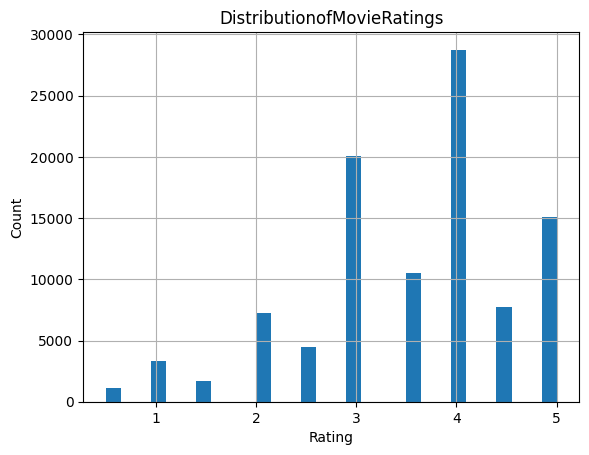

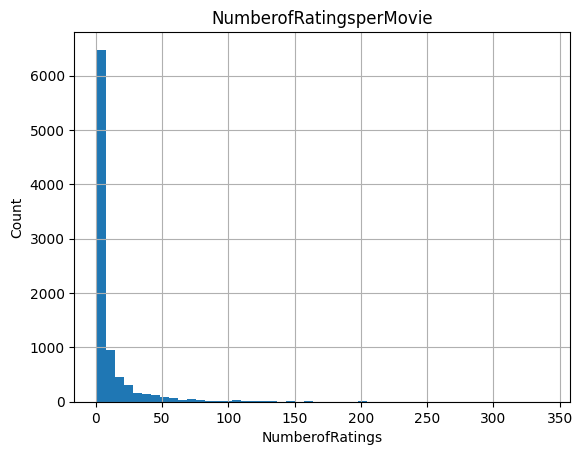

In [23]:
ratings['rating'].hist(bins=30)
plt.title('DistributionofMovieRatings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
ratings_per_movie=ratings.groupby('movieId').count()['rating']
ratings_per_movie.hist(bins=50)
plt.title('NumberofRatingsperMovie')
plt.xlabel('NumberofRatings')
plt.ylabel('Count')
plt.show()

In [8]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357291 sha256=48a41f42d16a9381a3c2b0785da2362e10acd3f954f3e22189672a113c124a52
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [24]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8909  0.9015  0.9006  0.9017  0.8902  0.8970  0.0053  
MAE (testset)     0.6861  0.6955  0.6932  0.6945  0.6875  0.6913  0.0038  
Fit time          2.64    1.71    1.69    1.62    1.67    1.87    0.39    
Test time         0.45    0.14    0.27    0.12    0.27    0.25    0.12    


{'test_rmse': array([0.8909048 , 0.90149   , 0.90062778, 0.90168405, 0.89023748]),
 'test_mae': array([0.68605916, 0.69549962, 0.69316641, 0.69452599, 0.68747213]),
 'fit_time': (2.642742872238159,
  1.7109155654907227,
  1.6938741207122803,
  1.6185433864593506,
  1.6659190654754639),
 'test_time': (0.44631171226501465,
  0.1358187198638916,
  0.26534008979797363,
  0.12170577049255371,
  0.2654592990875244)}

In [25]:
 trainset=data.build_full_trainset()
 svd.fit(trainset)

In [36]:
user_id = 8
movie_id = 10
rating_prediction = svd.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id}: {rating_prediction.est}")

Predicted rating for user 8 and movie 10: 3.4277893990101003


In [27]:

def recommend_movies(user_id, num_recommendations=10):
    movie_ids = movies['id'].unique()
    movie_ratings = [svd.predict(user_id, movie_id).est for movie_id in movie_ids]
    recommendations = pd.DataFrame({
        'movieId': movie_ids,
        'predicted_rating': movie_ratings
    })
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)
    top_recommendations = recommendations.head(num_recommendations)
    top_recommendations = pd.merge(top_recommendations, movies, left_on='movieId', right_on='id')
    return top_recommendations




In [35]:
recommendations = recommend_movies(1, 10)
recommendations.title

,title
0,Toy Story
1,I Hate Luv Storys
2,The Golden Bat
3,Festival
4,The Prospects
5,The Colour Out of Space
6,Foxtrot
7,Ghost Graduation
8,Duck Amuck
9,5 Flights Up


In [33]:
recommendations = recommend_movies(3, 10)
recommendations.title

,title
0,Toy Story
1,I Hate Luv Storys
2,The Golden Bat
3,Festival
4,The Prospects
5,The Colour Out of Space
6,Foxtrot
7,Ghost Graduation
8,Duck Amuck
9,5 Flights Up


In [34]:
recommendations = recommend_movies(10, 10)
recommendations.title

,title
0,Toy Story
1,I Hate Luv Storys
2,The Golden Bat
3,Festival
4,The Prospects
5,The Colour Out of Space
6,Foxtrot
7,Ghost Graduation
8,Duck Amuck
9,5 Flights Up
